# Image Segmentation - Part 4: Unsupervised Machine Learning

Made by: Noah Fahlgren Updated: July 17, 2025

## About this jupyter notebook

[Image segmentation](https://en.wikipedia.org/wiki/Image_segmentation) is the process of partitioning sets of image pixels into groups (e.g. foreground and background). In this module we will use an unsupervised machine learning approach to perform image segmentation.

# Importing libraries and image

In [25]:
## Import software libraries
%matplotlib widget
import matplotlib
from plantcv import plantcv as pcv
from plantcv.learn import train_kmeans

# Print out the version of PlantCV being used by the Jupyter kernel
pcv.__version__


'4.8'

In [26]:
# Global settings
matplotlib.rcParams["figure.max_open_warning"] = False
pcv.params.debug = "plot"
pcv.params.text_size = 30
pcv.params.text_thickness = 20
pcv.params.line_thickness = 10

## Clustering (unsupervised machine learning)

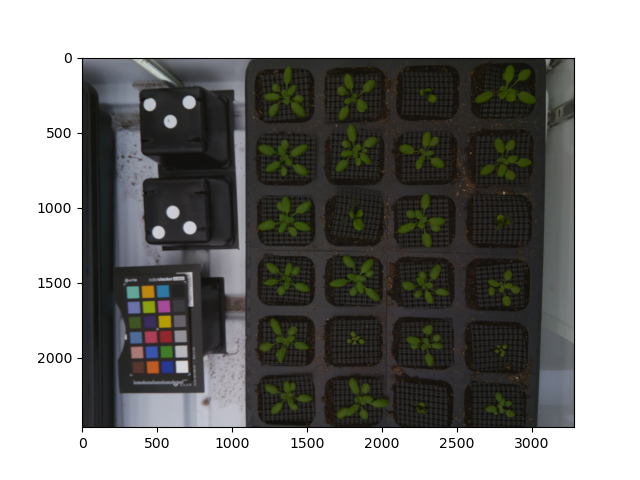

In [27]:
# Open image file
color_img, imgpath, imgname = pcv.readimage(filename="./img/10.9.1.230_pos-165-001-004_2019-11-01-10-05.jpg")


## Train the k-means model

k = the number of clusters to create. patch_size can be used to cluster the pixels based on small patches of pixels instead of
individual pixels (pixel_size=1). This helps with segmentation in some cases because the model is trained with spatial context
rather than only color values. In this example, we will use k=10 and patch_size=1 for simplicity.

In [28]:
train_kmeans(img_dir="./img/", k=10, patch_size=1)

,n_clusters,10
,init,'k-means++'
,max_iter,100
,batch_size,1024
,verbose,0
,compute_labels,True
,random_state,1
,tol,0.0
,max_no_improvement,10
,init_size,None
,n_init,10


## Segment the image using the k-means model

K-means labels every pixel in the image with a number from 0 to k-1, where k is the number of clusters (10 in this case).

Because k-means is unsupersived, we don't know which cluster(s) represent the foreground and which represent the background.
Using `pcv.predict_means` we can visualize the clusters in the image and identify which cluster IDs correspond to the plants
in the image below.

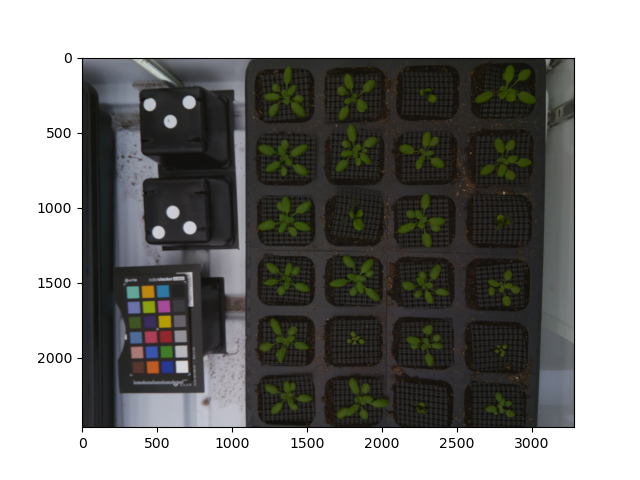

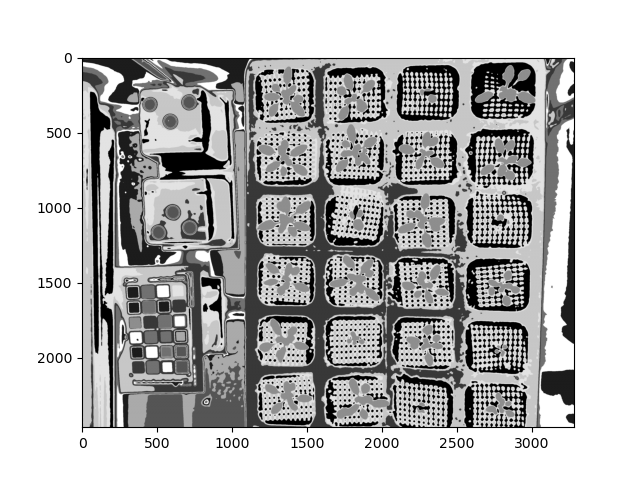

In [29]:
labeled_img = pcv.predict_kmeans(img="./img/10.9.1.230_pos-165-001-004_2019-11-01-10-05.jpg", patch_size=1)

## Combining clusters into a mask

In this example, the plants are in cluster 5 only, so we can create a mask that only includes pixels from cluster 5,
though in other cases you can include multiple clusters in the mask.

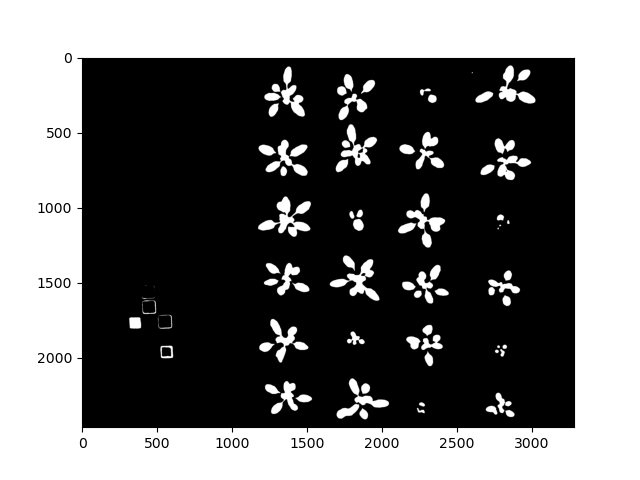

In [30]:
mask = pcv.mask_kmeans(labeled_img=labeled_img, k=10, cat_list=[5])